# Initialisation

## Imports

In [ ]:
import gc, torch
gc.collect()
try:
    torch.cuda.empty_cache()
except:
    pass

#jkflke


In [ ]:

from inc_import import *
from inc_charte import *



## Chargement des datas

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [12]:
# ###################################
# Chargement des datas
# ###################################

# https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

#dataEtudeSup = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/du-mlia-code/data/etudes-superieurs.csv',sep=';',  dtype={0: str})
dataEtudeSup = pd.read_csv('./data/etudes-superieurs.csv',sep=';',  dtype={0: str})
dataEtudeSup.columns = dataEtudeSup.columns.str.strip()  # Enlève espaces et tabulations


# Analyse des données


#Transformations non-linéaires

In [16]:
# Copie du dataset principal pour conserver la structure propre sans écrasement
df_transformed = dataEtudeSup.copy()

# Transformation quadratique (déjà jugée utile précédemment sur la base des log-odds)

# -> On vérifie juste si elle existe sinon on la crée
#if 'Age at enrollment^2' not in df_transformed.columns:
    #df_transformed['Age at enrollment^2'] = df_transformed['Age at enrollment'] ** 2

# Transformation logarithmique (si monotonicité observée dans les log-odds)
# -> Seulement pour les variables socio-économiques continues pertinentes (ex. Admission grade)
#df_transformed['log_Admission grade'] = np.log(df_transformed['Admission grade'])


## Définitions des paramètres

In [19]:
dataEtudeSup.head()  # Print the first rows of the dataframe

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [21]:
dataEtudeSup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [23]:
valeurs_uniques = {col: dataEtudeSup[col].nunique() for col in dataEtudeSup.columns}
for col, n in sorted(valeurs_uniques.items(), key=lambda x: x[1]):
    print(f"{col}: {n} valeurs uniques")

Daytime/evening attendance: 2 valeurs uniques
Displaced: 2 valeurs uniques
Educational special needs: 2 valeurs uniques
Debtor: 2 valeurs uniques
Tuition fees up to date: 2 valeurs uniques
Gender: 2 valeurs uniques
Scholarship holder: 2 valeurs uniques
International: 2 valeurs uniques
Target: 3 valeurs uniques
Marital status: 6 valeurs uniques
Application order: 8 valeurs uniques
Inflation rate: 9 valeurs uniques
Curricular units 2nd sem (without evaluations): 10 valeurs uniques
Unemployment rate: 10 valeurs uniques
GDP: 10 valeurs uniques
Curricular units 1st sem (without evaluations): 11 valeurs uniques
Course: 17 valeurs uniques
Previous qualification: 17 valeurs uniques
Application mode: 18 valeurs uniques
Curricular units 2nd sem (credited): 19 valeurs uniques
Curricular units 2nd sem (approved): 20 valeurs uniques
Nacionality: 21 valeurs uniques
Curricular units 1st sem (credited): 21 valeurs uniques
Curricular units 2nd sem (enrolled): 22 valeurs uniques
Curricular units 1st sem

In [25]:
dataEtudeSup.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [27]:
# dataEtudeSup[dataEtudeSup.columns].hist(bins=50, figsize=(20,15), color=chart_colors['blue'])
# plt.show

In [29]:
def plot_column_summary(df, col, notes='', color='#5486d6', figsize=(7, 3)):
    uniques = df[col].dropna().unique()
    n_uniques = len(uniques)

    # Affichage dans la console
    print(f"\nColonne : {col}")
    print(f"{n_uniques} valeurs uniques")
    if n_uniques <= 50:
        print("Valeurs : ", sorted(uniques))
    else:
        print("Valeurs : trop nombreuses pour afficher")
    print(f"Notes : \n{notes}")

    fig, ax = plt.subplots(figsize=figsize)
    plt.title(col, fontsize=12)

    if df[col].dtype.kind in 'biufc' and n_uniques > 10:
        df[col].hist(bins=30, color=color, ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title('Histogramme')
        # Si valeurs discrètes 0-9, forcer ticks
        if set(range(10)).issubset(set(df[col].dropna().astype(int).unique())):
            ax.set_xticks(range(10))
            ax.set_xticklabels([str(i) for i in range(10)])
    else:
        counts = df[col].value_counts().sort_index()
        sns.barplot(x=counts.index.astype(str), y=counts.values, color=color, ax=ax)
        ax.set_xlabel('')
        ax.set_ylabel('')
        ax.set_title('Distribution')
        # Forcer ticks X si numérique discret
        if all(isinstance(v, (int, float)) for v in counts.index):
            ax.set_xticks(range(len(counts)))
            ax.set_xticklabels(counts.index.astype(str), rotation=0)

    plt.tight_layout()
    plt.show()


Colonne : Marital status
6 valeurs uniques
Valeurs :  ['1', '2', '3', '4', '5', '6']
Notes : 

1. single / célibataire,
2. married / marié(e),
3. widower / veuf / veuve,
4. divorced / divorcé(e),
5. facto union / union de fait (concubinage),
6. legally separated / séparé(e) légalement



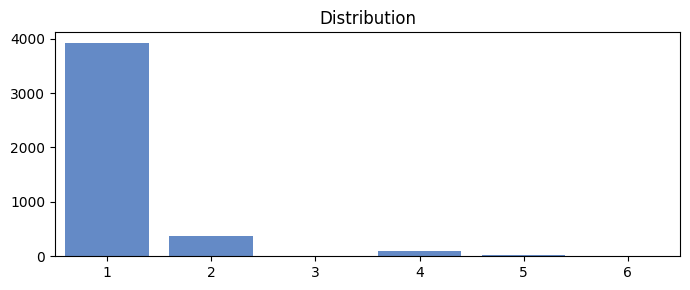

In [51]:
plot_column_summary(dataEtudeSup, 'Marital status', notes="""
1. single / célibataire,
2. married / marié(e),
3. widower / veuf / veuve,
4. divorced / divorcé(e),
5. facto union / union de fait (concubinage),
6. legally separated / séparé(e) légalement
""")



Colonne : Application mode
18 valeurs uniques
Valeurs :  [1, 2, 5, 7, 10, 15, 16, 17, 18, 26, 27, 39, 42, 43, 44, 51, 53, 57]
Notes : 

1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)



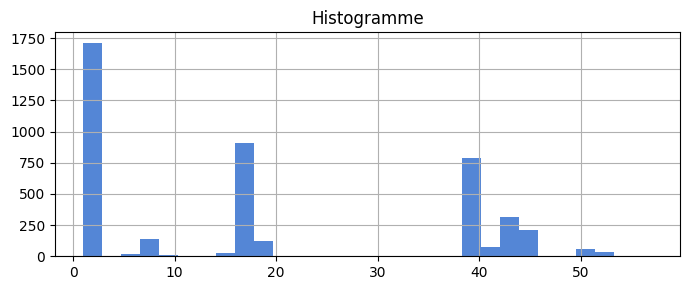

In [52]:
plot_column_summary(dataEtudeSup, 'Application mode',notes="""
1 - 1st phase - general contingent 2 - Ordinance No. 612/93 5 - 1st phase - special contingent (Azores Island) 7 - Holders of other higher courses 10 - Ordinance No. 854-B/99 15 - International student (bachelor) 16 - 1st phase - special contingent (Madeira Island) 17 - 2nd phase - general contingent 18 - 3rd phase - general contingent 26 - Ordinance No. 533-A/99, item b2) (Different Plan) 27 - Ordinance No. 533-A/99, item b3 (Other Institution) 39 - Over 23 years old 42 - Transfer 43 - Change of course 44 - Technological specialization diploma holders 51 - Change of institution/course 53 - Short cycle diploma holders 57 - Change of institution/course (International)
""")




Colonne : Application order
8 valeurs uniques
Valeurs :  [0, 1, 2, 3, 4, 5, 6, 9]
Notes : 
 Application order (between 0 - first choice; and 9 last choice)	 


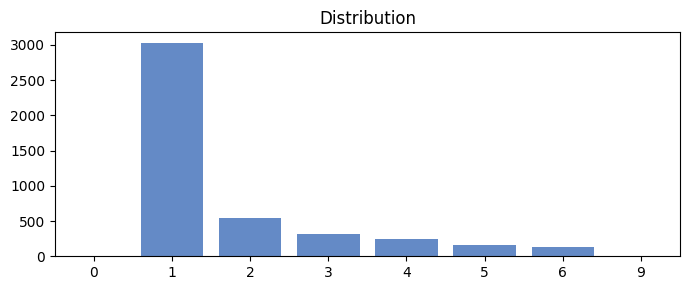

In [53]:
plot_column_summary(dataEtudeSup, 'Application order',notes=""" Application order (between 0 - first choice; and 9 last choice)	 """)




Colonne : Course
17 valeurs uniques
Valeurs :  [33, 171, 8014, 9003, 9070, 9085, 9119, 9130, 9147, 9238, 9254, 9500, 9556, 9670, 9773, 9853, 9991]
Notes : 
 Code de la filière ou du cursus suivi (17 valeurs possibles, ex. 1 = Technologies bio-carburant, 2 = Design multimédia, 3 = Service social (cours du soir), etc.)
	 


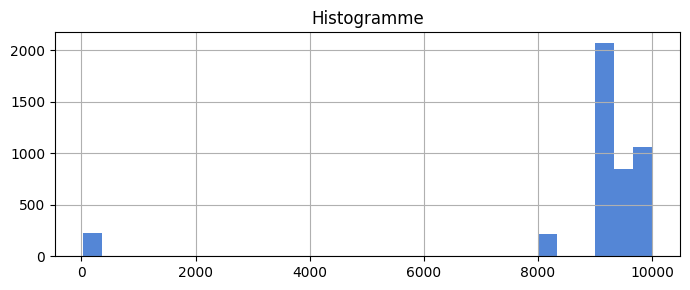

17
[  33  171 8014 9003 9070 9085 9119 9130 9147 9238 9254 9500 9556 9670
 9773 9853 9991]


In [54]:
plot_column_summary(dataEtudeSup, 'Course',notes=""" Code de la filière ou du cursus suivi (17 valeurs possibles, ex. 1 = Technologies bio-carburant, 2 = Design multimédia, 3 = Service social (cours du soir), etc.)
	 """)
print(dataEtudeSup['Course'].nunique())
print(dataEtudeSup['Course'].sort_values().unique()[:20])


Colonne : Daytime/evening attendance
2 valeurs uniques
Valeurs :  [0, 1]
Notes : 
  


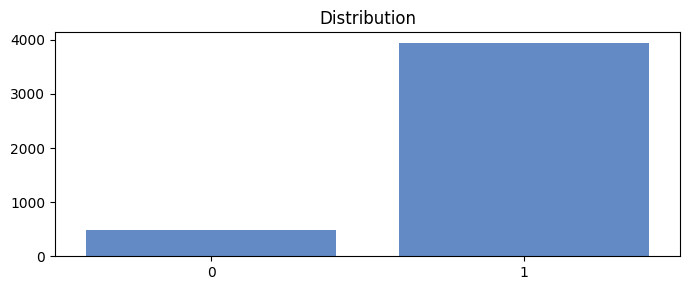

In [55]:
plot_column_summary(dataEtudeSup, 'Daytime/evening attendance',notes="""  """)


Colonne : Previous qualification
17 valeurs uniques
Valeurs :  [1, 2, 3, 4, 5, 6, 9, 10, 12, 14, 15, 19, 38, 39, 40, 42, 43]
Notes : 
  


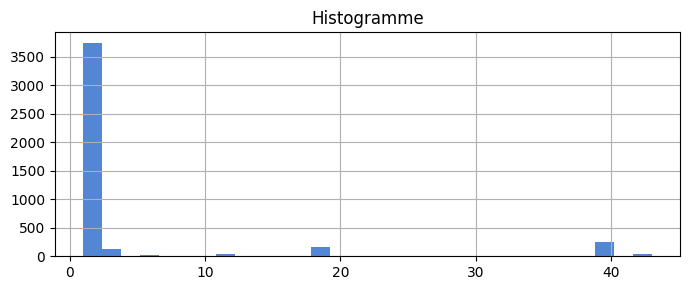

In [56]:
plot_column_summary(dataEtudeSup, 'Previous qualification',notes="""  """)


Colonne : Previous qualification (grade)
101 valeurs uniques
Valeurs : trop nombreuses pour afficher
Notes : 
  


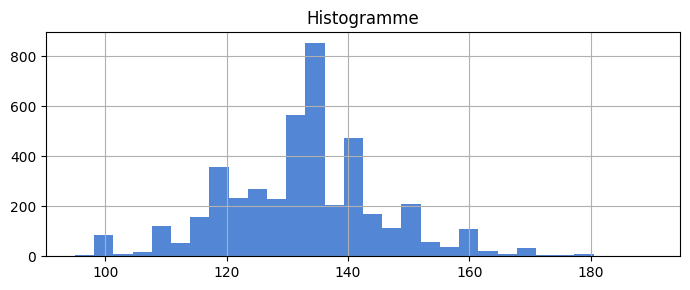

In [57]:

plot_column_summary(dataEtudeSup, 'Previous qualification (grade)',notes="""  """)


Colonne : Nacionality
21 valeurs uniques
Valeurs :  [1, 2, 6, 11, 13, 14, 17, 21, 22, 24, 25, 26, 32, 41, 62, 100, 101, 103, 105, 108, 109]
Notes : 
  


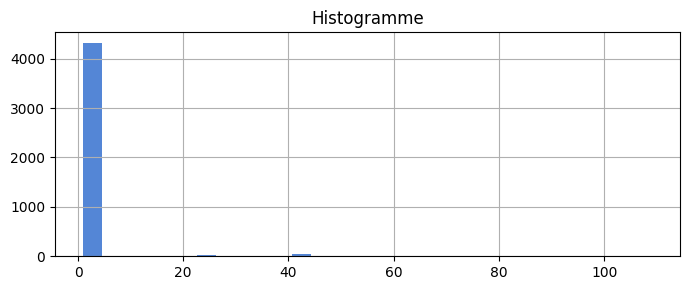

In [58]:
plot_column_summary(dataEtudeSup, 'Nacionality',notes="""  """)


Colonne : Mother's qualification
29 valeurs uniques
Valeurs :  [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 14, 18, 19, 22, 26, 27, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Notes : 
  


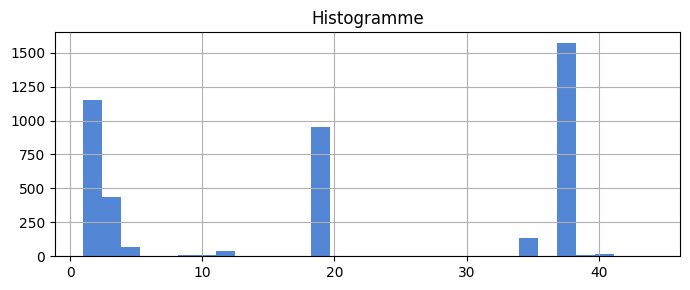


Colonne : Father's qualification
34 valeurs uniques
Valeurs :  [1, 2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 18, 19, 20, 22, 25, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]
Notes : 
  


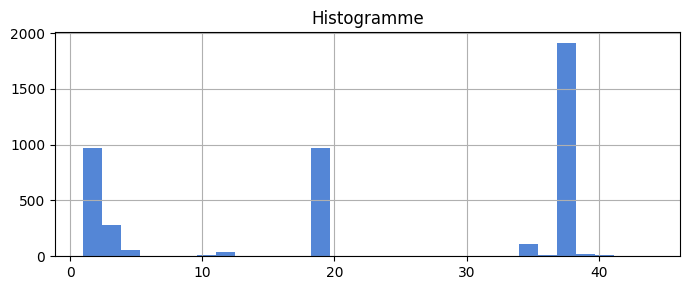

In [59]:

plot_column_summary(dataEtudeSup, "Mother's qualification",notes="""  """)
plot_column_summary(dataEtudeSup, "Father's qualification",notes="""  """)



## Etudes des données

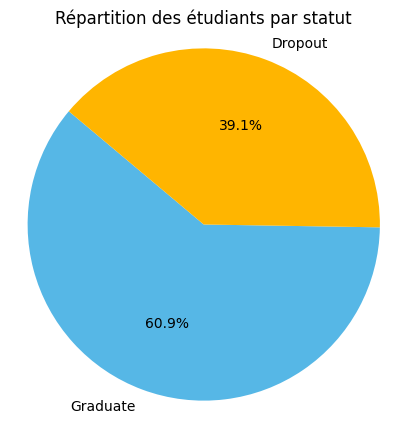

In [60]:
# ###################################
# target
# ###################################
dataEtudeSup = dataEtudeSup[dataEtudeSup["Target"] != "Enrolled"]

target_counts = dataEtudeSup['Target'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(
    target_counts,
    labels=target_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=color_list_graph  # couleurs optionnelles
)

plt.title("Répartition des étudiants par statut")
plt.axis('equal')  # Pour un cercle parfait
import plotly.graph_objects as go
plt.show()

In [61]:

gender_labels = ['F', 'M']
gender_values=dataEtudeSup['Gender'].value_counts().tolist()
fig = go.Figure()
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'pie'}, {'type':'bar'}]],horizontal_spacing = 0.25)

fig.add_trace(go.Pie(labels=gender_labels, values=gender_values, name='Gender Distribution',
                     marker_colors=["#4CAF50","#2CCED2"],hole=0.5),row=1, col=1)
att = dataEtudeSup.groupby(['Gender','Target']).agg(count =('Target','count')).reset_index()

fig.add_trace(go.Bar(x = att[att.Target =='Graduate']['Gender'], y = att[att.Target =='Graduate']["count"],
                     name = 'Graduate',
    marker = dict(color="#4CAF50")),row=1, col=2)
fig.add_trace(go.Bar(x = att[att.Target =='Dropout']['Gender'], y = att[att.Target =='Dropout']["count"],
                     name = 'Dropout',
    marker = dict(color ="#FF7043")),row=1, col=2)
fig.add_trace(go.Bar(x = att[att.Target =='Enrolled']['Gender'], y = att[att.Target =='Enrolled']["count"],
                     name = 'Enrolled',
    marker = dict(color ="#42A5F5")),row=1, col=2)

fig.update_layout(height = 500, width = 850, bargap = 0.1, xaxis = dict(tickmode ='linear'),
                  title_text ="<b>Distribution par genre</b>",paper_bgcolor ="#F4F6FB",
                  plot_bgcolor ="#F4F6FB",
                  title_font = dict(size = 20, family ='Verdana', color ='#003566'),
                  hoverlabel = dict(font_size = 13))
fig.update_layout(shapes = [dict(type ="line", xref ='paper', yref ='paper',
                                 x0 = -0.06, y0 = 1.121, x1 = 0.435, y1 = 1.121)])
fig.update_layout(legend = dict(orientation ="h", yanchor ="top", y = 1.133, xanchor ="right", x = 1.1))


fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=['0', '1'],
        ticktext=['Femme', 'Homme']
    )
)

fig.show()

#Analyse de la linéarité


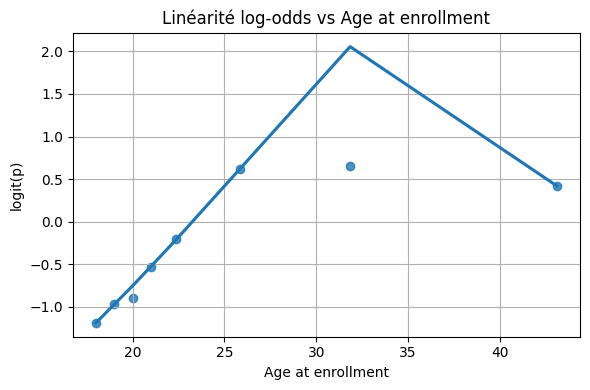

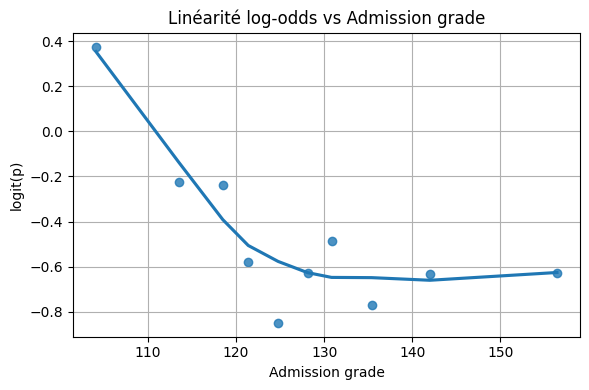

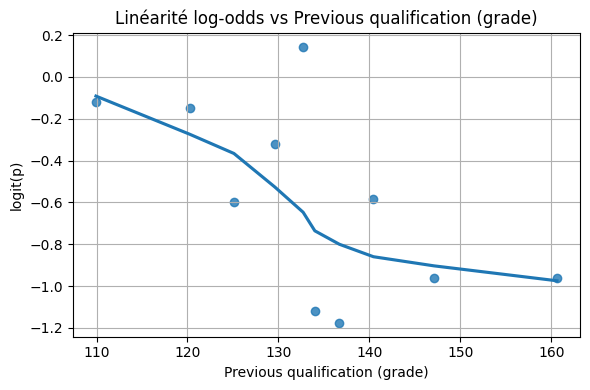

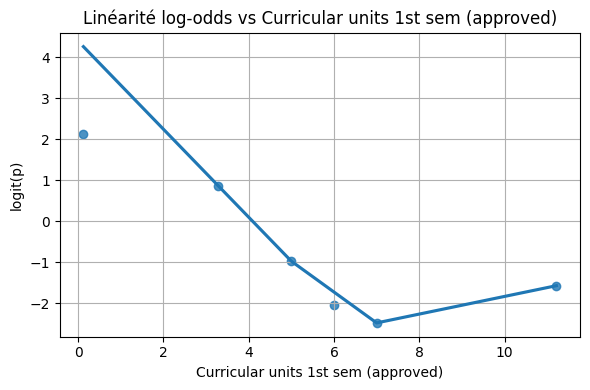

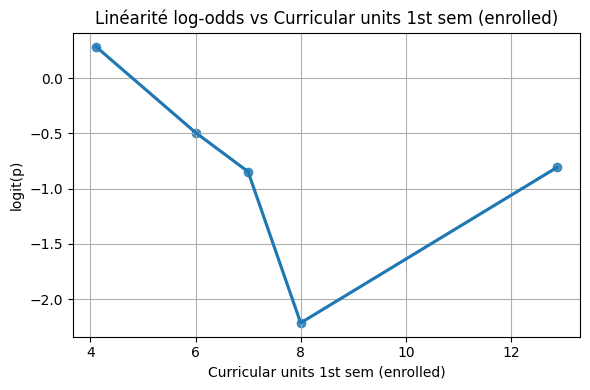

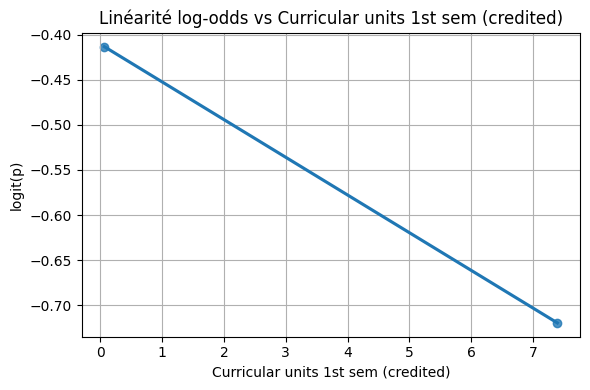

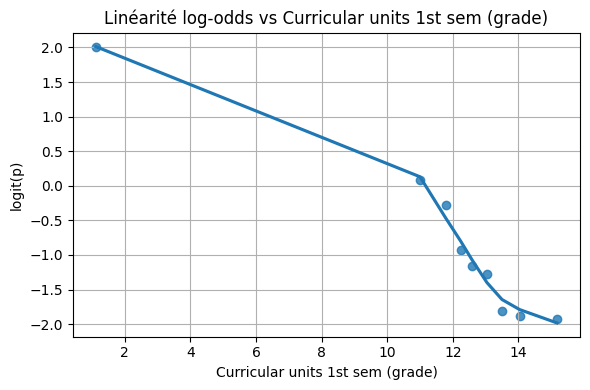

In [62]:
# Liste des variables continues à tester
variables_continues = [
    'Age at enrollment',
    'Admission grade',
    'Previous qualification (grade)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (grade)'
]

# la target a été déjà binarisée (Dropout = 1, sinon 0)
df_temp = dataEtudeSup.copy()

# Convert 'Target' to binary (0 for Non-Dropout, 1 for Dropout)
df_temp['Target'] = (df_temp['Target'] == 'Dropout').astype(int)


# Boucle sur chaque variable pour tracer le lien avec logit
for var in variables_continues:
    # Drop rows where the continuous variable is NaN or infinite
    df_temp_cleaned = df_temp.replace([np.inf, -np.inf], np.nan).dropna(subset=[var, 'Target'])

    # Check if there are enough unique values for qcut
    if df_temp_cleaned[var].nunique() < 10:
        print(f"Skipping {var}: Not enough unique values for binning.")
        continue

    try:
        df_temp_cleaned['bin'] = pd.qcut(df_temp_cleaned[var], q=10, duplicates='drop')  # Discrétisation en déciles
    except ValueError as e:
        print(f"Could not create 10 bins for {var}: {e}")
        # If 10 bins are not possible, try with fewer bins or skip
        try:
             df_temp_cleaned['bin'] = pd.qcut(df_temp_cleaned[var], q=5, duplicates='drop') # Try with 5 bins
             print(f"Using 5 bins for {var}.")
        except ValueError:
             print(f"Skipping {var}: Could not create enough bins.")
             continue


    grouped = df_temp_cleaned.groupby('bin')['Target'].mean()
    midpoints = df_temp_cleaned.groupby('bin')[var].mean()

    # Handle cases where grouped might have values of 0 or 1, which cause logit to be infinite
    # Replace 0 with a very small number and 1 with a number very close to 1
    grouped_clipped = grouped.clip(lower=1e-6, upper=1 - 1e-6)

    plt.figure(figsize=(6, 4))
    sns.regplot(x=midpoints, y=logit(grouped_clipped), ci=None, lowess=True)
    plt.xlabel(var)
    plt.ylabel("logit(p)")
    plt.title(f"Linéarité log-odds vs {var}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Corrélations entre les colonnes

<function matplotlib.pyplot.show(close=None, block=None)>

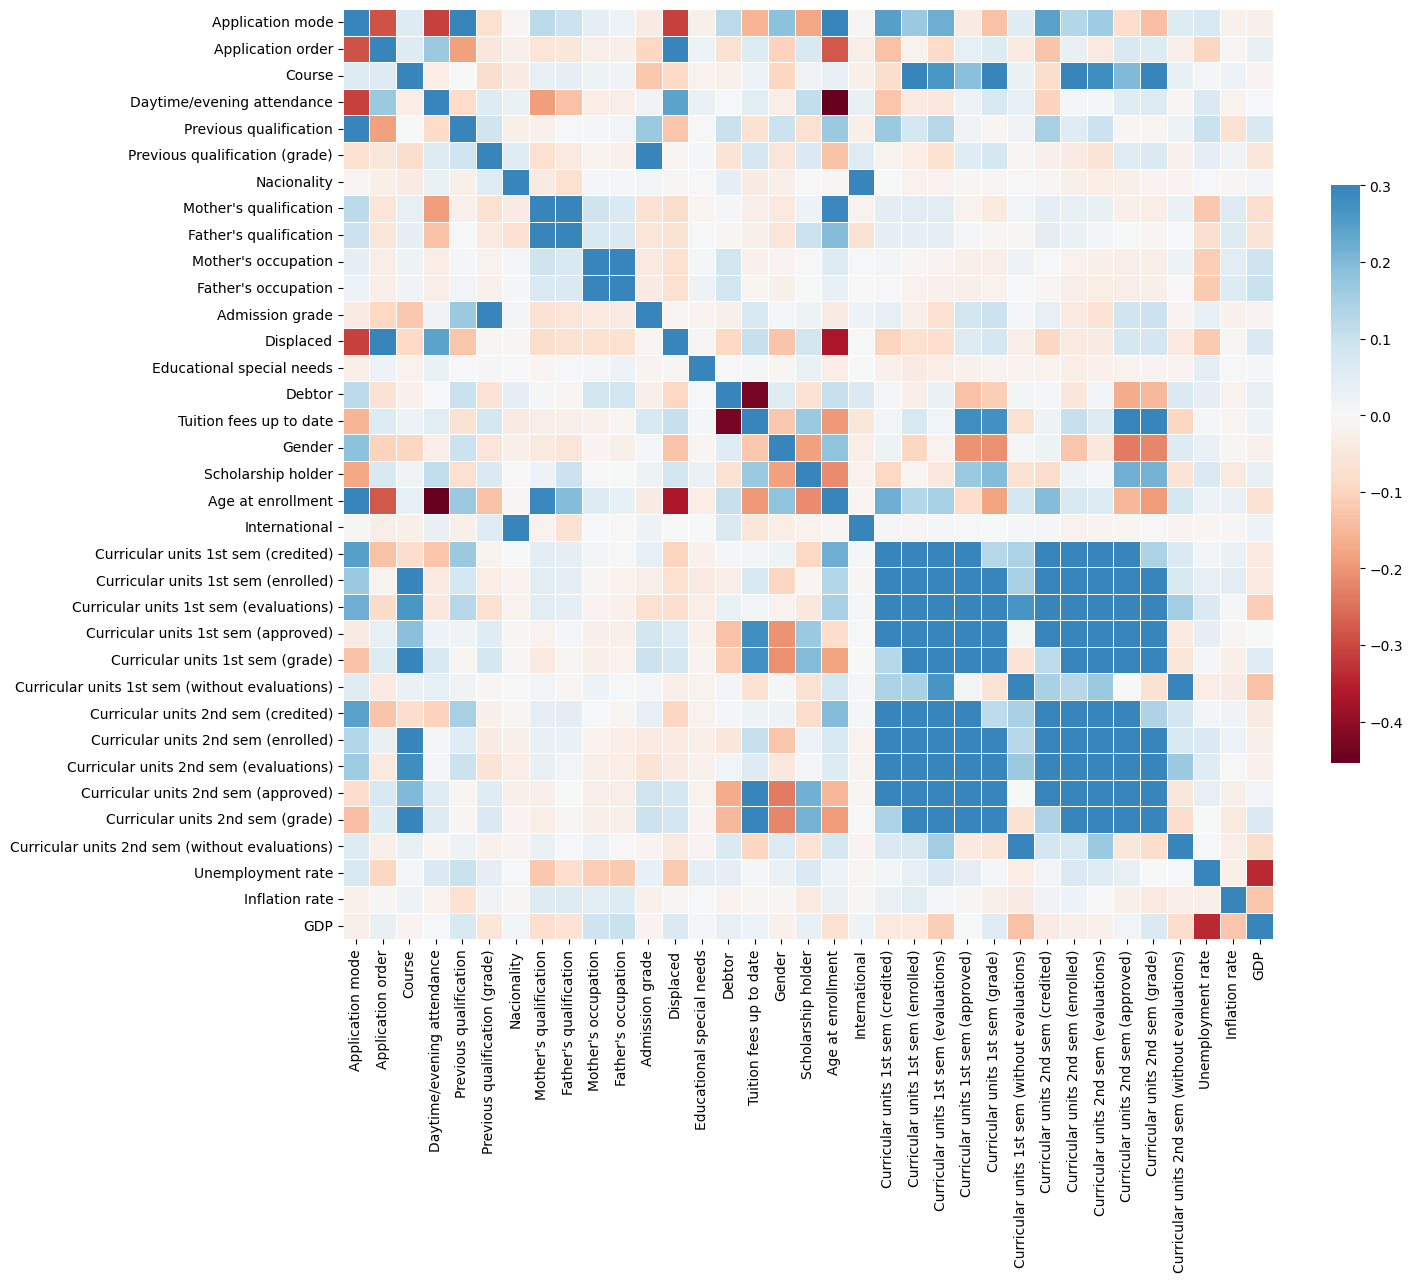

In [63]:
f = plt.figure(figsize=(15, 15))
df_numeric = dataEtudeSup.select_dtypes(include=['number'])
sns.heatmap(df_numeric.corr(),annot=False, cmap='RdBu',vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show

# Traitement des données

#Transformations pour linéarité log-odds


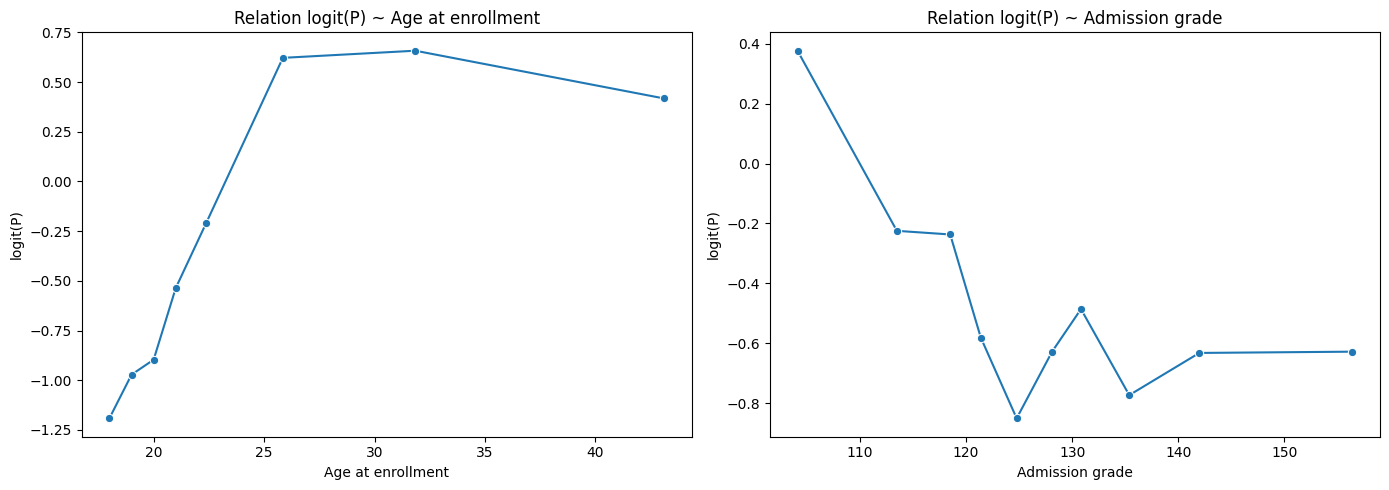

In [64]:
# Dataset propre (socio-éco uniquement)
df = dataEtudeSup.copy()

# Convertir la target en binaire dès le début
df['Target'] = (df['Target'] == 'Dropout').astype(int)

# Variables continues socio-économiques à tester
variables_continues = [
    'Age at enrollment',
    'Admission grade'
]

# Visualisation : relation entre variable et logit(P(Dropout))
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

for i, var in enumerate(variables_continues):
    df_temp = df[[var, 'Target']].dropna()

    # Discrétisation en quantiles pour lisser la relation
    df_temp['quantile'] = pd.qcut(df_temp[var], q=10, duplicates='drop')

    grouped = df_temp.groupby('quantile').agg(
        moyenne_valeur=(var, 'mean'),
        proba_dropout=('Target', 'mean')
    ).dropna()

    # Suppression des valeurs extrêmes (logit non défini pour proba = 0 ou 1)
    grouped = grouped[grouped['proba_dropout'].between(0.01, 0.99)]
    grouped['logit'] = logit(grouped['proba_dropout'])

    # Tracé
    sns.lineplot(ax=axes[i], data=grouped, x='moyenne_valeur', y='logit', marker='o')
    axes[i].set_title(f'Relation logit(P) ~ {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('logit(P)')

plt.tight_layout()
plt.show()


## Mapping

In [65]:
mappings = {
    'Marital status': {
        '1': 'single',
        '2': 'married',
        '3': 'widower',
        '4': 'divorced',
        '5': 'facto union',
        '6': 'legally separated'
    },

    'Daytime/evening attendance': {
        '1': 'Daytime',
        '0': 'Evening'
    },
}


force_categorical = [
    'Application mode',
    'Mother\'s qualification',
    'Father\'s qualification',
    'Course',
    'Previous qualification',
    'Mother\'s occupation',
    'Father\'s occupation',
    'Nacionality',
    'Displaced',
    'Educational special needs',
    'Debtor',
    'Tuition fees up to date',
    'Gender',
    'Scholarship holder',
    'International',
]




from sklearn.preprocessing import LabelEncoder

def encode_dataset(df, use_one_hot=True, drop_first=True):
    df_encoded = df.copy()
    df_encoded.columns = df_encoded.columns.str.strip()  # Nettoyage des noms

    for col in df_encoded.columns:
        if col == 'Target':
            continue  # Ne pas encoder la variable cible

        # Si un mapping est défini pour cette colonne
        if col in mappings:
            df_encoded[col] = df_encoded[col].astype(str).map(mappings[col])
            df_encoded[col] = df_encoded[col].astype('category')

        # Si la colonne est dans la liste des colonnes à forcer comme catégorielles
        if col in force_categorical:
            df_encoded[col] = df_encoded[col].astype(str)

        # Encodage
        if df_encoded[col].dtype == 'object' or df_encoded[col].dtype.name == 'category':
            n_unique = df_encoded[col].nunique()

            if use_one_hot and n_unique <= 10:
                # One-Hot Encoding avec drop_first pour éviter redondance
                df_encoded = pd.get_dummies(df_encoded, columns=[col], prefix=col.replace(" ", "_"),drop_first=drop_first)
            else:
                # Label Encoding sinon
                le = LabelEncoder()
                df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

    return df_encoded



#Pour modèles comme RandomForest, LogisticRegression, etc. :
#df_ml = encode_dataset(dataEtudeSup, use_one_hot=True, mappings=mapping_dicts)


#Pour XGBoost / LightGBM (acceptent les entiers en catégorie) :
#df_ml = encode_dataset(dataEtudeSup, use_one_hot=False, mappings=mapping_dicts)


#Normalisation

In [66]:
#DecisionTree, RandomForest, XGBoost
#Non

#Logistic Regression, SVM, KNN, NN
#Oui


#scaler = StandardScaler()
#df['Application order'] = scaler.fit_transform(df[['Application order']])
#df['Previous qualification (grade)'] = scaler.fit_transform(df[['Previous qualification (grade)']])



## Suppression des colonnes

In [67]:
# Correction : concaténer les colonnes au lieu de les écraser

colonnes_a_supprimer = [col for col in dataEtudeSup.columns if col.startswith('Curricular')]
#colonnes_a_supprimer = [col for col in dataEtudeSup.columns if col.startswith('Curricular units 2')]
#colonnes_a_supprimer += [col for col in dataEtudeSup.columns if col.startswith('Curricular units 1st sem')]
colonnes_a_supprimer += ['Tuition fees up to date', 'Application mode', 'Unemployment rate', 'Inflation rate', 'GDP']


# Application réelle de la suppression sur la base principale
dataEtudeSup = dataEtudeSup.drop(columns=colonnes_a_supprimer, errors='ignore')

## Gestion de la colonne target


In [68]:
# Raisonnement : les étudiants encore inscrits ("Enrolled") ont un statut inconnu
# -> Les garder dans la modélisation créerait de l'incertitude (biais potentiel)
# -> On les supprime pour ne garder que les cas au statut final connu

dataEtudeSup = dataEtudeSup[dataEtudeSup['Target'].isin(['Dropout', 'Graduate'])]

# Transformation binaire :
# Dropout => 1 (positif, élève en décrochage)
# Graduate => 0 (négatif, élève qui a terminé avec succès)
dataEtudeSup['Target'] = (dataEtudeSup['Target'] == 'Dropout').astype(int)

# Vérification rapide de l'équilibre des classes
print("Répartition de la variable cible (Dropout = 1 / Graduate = 0) :")
print(dataEtudeSup['Target'].value_counts())

df_transformed['Target'] = (df_transformed['Target'] == 'Dropout').astype(int)


Répartition de la variable cible (Dropout = 1 / Graduate = 0) :
Target
0    2209
1    1421
Name: count, dtype: int64


##Préparation à la modélisation

In [69]:
from sklearn.model_selection import StratifiedKFold

# Définir un schéma de validation croisée
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Tests de modèles

## Régression logistique


=== Comparaison class_weight (k=15) ===
                                config     mean       sd
fold               RL_RFE_k15_balanced  50.5000  29.0115
threshold          RL_RFE_k15_balanced   0.4433   0.0500
auc                RL_RFE_k15_balanced   0.7500   0.0166
ap                 RL_RFE_k15_balanced   0.5782   0.0264
f1_dropout         RL_RFE_k15_balanced   0.5949   0.0161
recall_dropout     RL_RFE_k15_balanced   0.7639   0.0711
precision_dropout  RL_RFE_k15_balanced   0.4924   0.0390
brier              RL_RFE_k15_balanced   0.2031   0.0053
fold                  RL_RFE_k15_plain  50.5000  29.0115
threshold             RL_RFE_k15_plain   0.2741   0.0371
auc                   RL_RFE_k15_plain   0.7496   0.0168
ap                    RL_RFE_k15_plain   0.5776   0.0265
f1_dropout            RL_RFE_k15_plain   0.5946   0.0162
recall_dropout        RL_RFE_k15_plain   0.7703   0.0633
precision_dropout     RL_RFE_k15_plain   0.4882   0.0349
brier                 RL_RFE_k15_plain   0.1820 

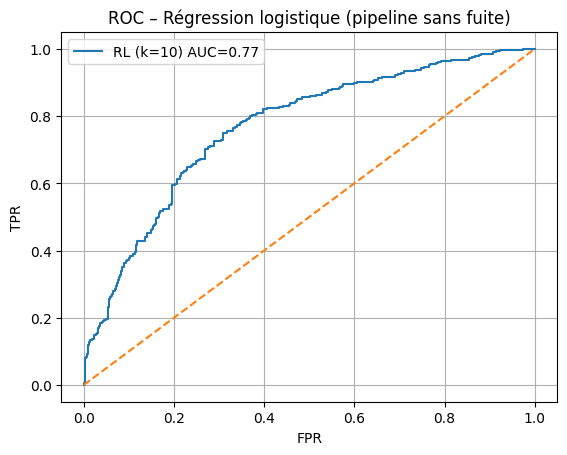


Variables socio-économiques les plus influentes (descriptif) :
 Scholarship_holder_1             -0.509310
Age at enrollment                 0.467026
Debtor_1                          0.450682
Gender_1                          0.307678
Admission grade                  -0.241772
Mother's occupation              -0.162646
Marital_status_single             0.105063
Previous qualification (grade)    0.068651
Previous qualification            0.054325
Father's occupation               0.043478
dtype: float64


In [70]:
# ================= RL — version alignée (X_train/X_test/y_train/y_test) =================
import numpy as np, pandas as pd
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.multitest import multipletests
from dataclasses import dataclass

from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score,
    f1_score, recall_score, precision_score, brier_score_loss
)
import matplotlib.pyplot as plt

# ---------- 0) Données & split (aligné avec le projet) ----------
df_model   = df_transformed.drop(columns=colonnes_a_supprimer, errors='ignore').copy()
df_encoded = encode_dataset(df_model, use_one_hot=True, drop_first=True)

X_full = df_encoded.drop(columns=['Target'])
y_full = df_encoded['Target']

# Split unique pour TOUTES les comparaisons
X_train, X_test, y_train, y_test = train_test_split(
    X_full, y_full, test_size=0.2, stratify=y_full, random_state=42
)

X_test_rl = X_test
y_test_rl = y_test

# CV répliquée (pour stabilité) — sur le TRAIN uniquement
cv_repeated = RepeatedStratifiedKFold(n_splits=5, n_repeats=20, random_state=42)

# ---------- 1) Sélecteur p-value (dans pipeline, pas de fuite) ----------
from sklearn.base import BaseEstimator, TransformerMixin

class UnivariatePValueSelector(BaseEstimator, TransformerMixin):
    """
    Pour chaque feature x_j, ajuste y ~ const + x_j (Logit), récupère la p-value,
    contrôle FDR (Benjamini–Hochberg) et conserve les variables retenues.
    S'exécute en CV dans le Pipeline => pas de fuite.
    """
    def __init__(self, alpha=0.05, method="fdr_bh", min_keep=10):
        self.alpha = alpha
        self.method = method
        self.min_keep = min_keep

    def fit(self, X, y):
        cols = X.columns
        pvals = np.full(len(cols), np.nan, dtype=float)
        for j, c in enumerate(cols):
            try:
                Xc = add_constant(X[[c]].astype(float), has_constant="add")
                model = sm.Logit(y.values, Xc.values, missing="drop")
                res = model.fit(disp=False)
                pvals[j] = res.pvalues[1] if len(res.pvalues) > 1 else np.nan
            except Exception:
                pvals[j] = np.nan

        mask_valid = ~np.isnan(pvals)
        keep = np.zeros_like(pvals, dtype=bool)
        if mask_valid.any():
            rej, _, _, _ = multipletests(pvals[mask_valid], alpha=self.alpha, method=self.method)
            keep[mask_valid] = rej

        # Assure un minimum de variables pour RFE
        if keep.sum() < self.min_keep:
            order = np.argsort(np.nan_to_num(pvals, nan=np.inf))
            keep[order[:self.min_keep]] = True

        self.keep_cols_ = cols[keep].tolist()
        return self

    def transform(self, X):
        return X if not hasattr(self, "keep_cols_") or not self.keep_cols_ else X[self.keep_cols_]

# ---------- 2) Outils ----------
@dataclass
class EvalResult:
    metrics: pd.DataFrame          # 1 ligne par run
    stability: pd.Series           # fréquence de sélection des variables
    selected_counts: pd.Series     # nb sélections par variable

def optimal_threshold_from_pr(y_true, y_proba):
    p, r, thr = precision_recall_curve(y_true, y_proba)
    f1 = 2 * (p * r) / (p + r + 1e-9)
    idx = np.nanargmax(f1[:-1])  # éviter le dernier point
    return thr[idx]

def summarize(config_name, res: EvalResult) -> pd.DataFrame:
    m, s = res.metrics.mean(numeric_only=True), res.metrics.std(numeric_only=True)
    out = pd.DataFrame({'config': config_name, 'mean': m.round(4), 'sd': s.round(4)})
    return out[['config','mean','sd']]

# ---------- 3) Évaluation RL (pval -> scaler -> RFE(LogReg) -> LogReg) ----------
def evaluate_logreg_rfe(
    X, y, class_weight=None, n_features_to_select=15,
    solver='liblinear', max_iter=2000, pval_alpha=0.05, pval_method='fdr_bh'
) -> EvalResult:
    feats = X.columns.to_list()
    sel_count = pd.Series(0, index=feats, dtype=int)
    rows = []

    base = LogisticRegression(solver=solver, max_iter=max_iter, class_weight=class_weight)
    pipe = Pipeline(steps=[
        ('pval',   UnivariatePValueSelector(alpha=pval_alpha, method=pval_method,
                                            min_keep=max(10, n_features_to_select))),
        ('scaler', StandardScaler()),
        ('rfe',    RFE(estimator=base, n_features_to_select=n_features_to_select)),
        ('clf',    LogisticRegression(solver=solver, max_iter=max_iter, class_weight=class_weight)),
    ])

    for i, (tr, va) in enumerate(cv_repeated.split(X, y), 1):
        X_tr, X_va = X.iloc[tr], X.iloc[va]
        y_tr, y_va = y.iloc[tr], y.iloc[va]
        pipe.fit(X_tr, y_tr)

        # Stabilité post-RFE (ramenée aux features d'origine)
        X_tr_pval = pipe.named_steps['pval'].transform(X_tr)
        cols_after_pval = X_tr_pval.columns
        support = pipe.named_steps['rfe'].support_
        selected_after_pval = np.array(cols_after_pval)[support]
        sel_count[selected_after_pval] += 1

        proba = pipe.predict_proba(X_va)[:, 1]
        thr = optimal_threshold_from_pr(y_va, proba)
        pred = (proba >= thr).astype(int)

        rows.append({
            'fold': i,
            'threshold': thr,
            'auc': roc_auc_score(y_va, proba),
            'ap': average_precision_score(y_va, proba),
            'f1_dropout': f1_score(y_va, pred, zero_division=0),
            'recall_dropout': recall_score(y_va, pred, zero_division=0),
            'precision_dropout': precision_score(y_va, pred, zero_division=0),
            'brier': brier_score_loss(y_va, proba),
        })

    metrics = pd.DataFrame(rows)
    stability = (sel_count / len(metrics)).sort_values(ascending=False)
    return EvalResult(metrics=metrics, stability=stability, selected_counts=sel_count)

# ---------- 4) Expériences rapides (sur le TRAIN uniquement) ----------
res_bal   = evaluate_logreg_rfe(X_train, y_train, class_weight='balanced', n_features_to_select=15)
res_plain = evaluate_logreg_rfe(X_train, y_train, class_weight=None,          n_features_to_select=15)

summary_cw = pd.concat([
    summarize('RL_RFE_k15_balanced', res_bal),
    summarize('RL_RFE_k15_plain',    res_plain),
])
print("=== Comparaison class_weight (k=15) ===")
print(summary_cw[['config','mean','sd']])

print("\nTop stabilité (balanced):\n", res_bal.stability.head(15))

# Balayage k
grid_k = [6, 10, 15]
stab_by_k, rows = {}, []
for k in grid_k:
    res_k = evaluate_logreg_rfe(X_train, y_train, class_weight='balanced', n_features_to_select=k)
    stab_by_k[k] = res_k.stability
    s = summarize(f'RL_balanced_k{k}', res_k); s['k'] = k; rows.append(s)

summary_k = pd.concat(rows).sort_values(['mean','k'], ascending=[False, True])
print("\n=== Balayage k et performances (TRAIN-CV) ===")
print(summary_k)

stab_df = pd.DataFrame({f'k={k}': stab_by_k[k] for k in grid_k}).fillna(0)
stab_df['freq_max'] = stab_df.max(axis=1)
stab_df = stab_df.sort_values('freq_max', ascending=False)
print("\n=== Stabilité par variable (k∈{6,10,15}) ===\n", stab_df.head(20))

# Contrôle de variables phares (ex.)
cands = [c for c in X_train.columns if ('Gender' in c) or ('Age at enrollment' in c)]
if cands:
    res_ref = evaluate_logreg_rfe(X_train, y_train, class_weight='balanced', n_features_to_select=10)
    print("\n=== Contrôle variables phares (freq. sélection sur 100 runs, k=10 balanced) ===")
    print(res_ref.stability.loc[res_ref.stability.index.intersection(cands)].sort_values(ascending=False))
else:
    print("\n[Info] Colonnes 'Gender' / 'Age at enrollment' introuvables après encodage — vérifie les noms exacts (dummies).")

# ---------- 5) Modèle final (pipe_best) & ROC sur TEST ----------
best_k = 10
pipe_best = Pipeline(steps=[
    ('pval',   UnivariatePValueSelector(alpha=0.05, method='fdr_bh', min_keep=max(10, best_k))),
    ('scaler', StandardScaler()),
    ('rfe',    RFE(estimator=LogisticRegression(solver='liblinear', max_iter=2000, class_weight='balanced'),
                   n_features_to_select=best_k)),
    ('clf',    LogisticRegression(solver='liblinear', max_iter=2000, class_weight='balanced')),
])

# Fit sur le TRAIN (important pour la comparaison entre modèles)
pipe_best.fit(X_train, y_train)

# Probabilités sur TEST (pour ta comparaison ROC)
proba_rl_test = pipe_best.predict_proba(X_test)[:, 1]

# ROC illustrative (RL seule)
fpr, tpr, _ = roc_curve(y_test, proba_rl_test)
plt.figure()
plt.plot(fpr, tpr, label=f'RL (k={best_k}) AUC={auc(fpr,tpr):.2f}')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC – Régression logistique (pipeline sans fuite)')
plt.legend(); plt.grid(); plt.show()

# ---------- 6) Coefficients finaux (descriptif) ----------
X_all_pval = pipe_best.named_steps['pval'].transform(X_train)  # sur train (cohérent)
mask = pipe_best.named_steps['rfe'].support_
final_cols = X_all_pval.columns[mask]
coefs = pd.Series(pipe_best.named_steps['clf'].coef_[0], index=final_cols)\
        .sort_values(key=np.abs, ascending=False)
print("\nVariables socio-économiques les plus influentes (descriptif) :\n", coefs.head(10))
# ===================================================================


## Arbre : DecisionTreeClassifier

[Decision Tree] Configuration figée -> {'max_depth': 7.0, 'min_samples_split': 10.0, 'min_samples_leaf': 5.0, 'mean_f1': 0.752442766595569} + ccp_alpha=0.001390

=== Decision Tree (calibré) — Test set ===
Seuil PR-optimal: 0.437
AUC ROC: 0.764
AP (PR-AUC): 0.664
F1: 0.678
Recall: 0.813
Precision: 0.582
Brier: 0.198
Accuracy: 0.698


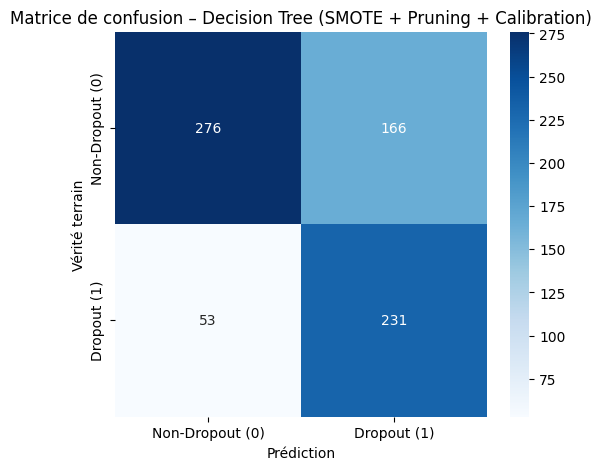

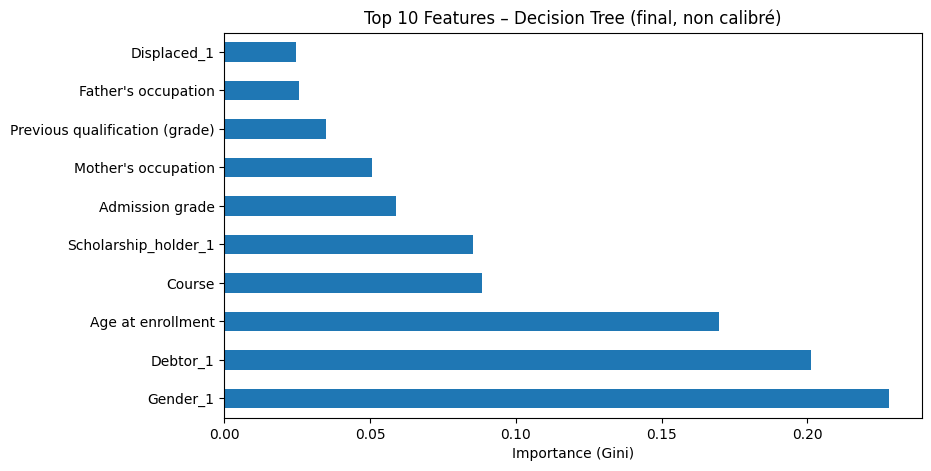


=== Stabilité (DT) — RepeatedStratifiedKFold 5×20, importance>0 ===
                                    stability  mean_importance
Gender_1                                 1.00         0.209440
Debtor_1                                 1.00         0.193580
Age at enrollment                        1.00         0.157221
Scholarship_holder_1                     1.00         0.091862
Course                                   1.00         0.078047
Admission grade                          1.00         0.077356
Previous qualification (grade)           1.00         0.052551
Mother's occupation                      1.00         0.039344
Father's occupation                      1.00         0.029574
Displaced_1                              0.96         0.016337
Father's qualification                   0.94         0.016040
Mother's qualification                   0.89         0.013041
Marital_status_single                    0.83         0.009383
Application order                        0.67    

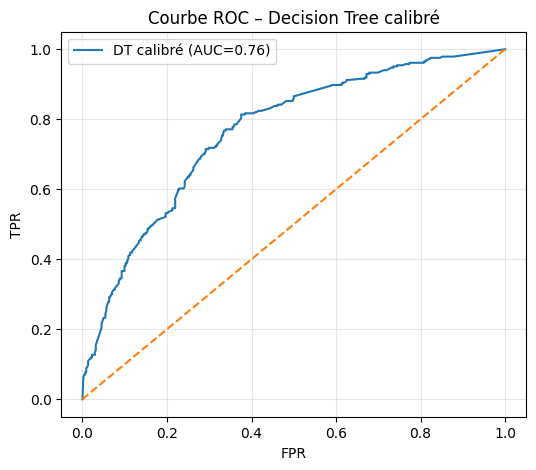

In [71]:

import numpy as np, pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (f1_score, precision_score, recall_score, accuracy_score,
                             roc_auc_score, roc_curve, auc, precision_recall_curve,
                             average_precision_score, confusion_matrix, brier_score_loss)
from imblearn.over_sampling import SMOTE
from sklearn.calibration import CalibratedClassifierCV
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.RandomState(42)

# --------------------- Données  ---------------------
df_ml = encode_dataset(dataEtudeSup, use_one_hot=True)
X = df_ml.drop('Target', axis=1)
y = df_ml['Target']

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# SMOTE appliqué une seule fois (sur le train) pour l'entraînement final
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# --------------------- Utilitaires communs (réutilisables pour d'autres modèles) ---------------------
def pr_opt_threshold(y_true, y_proba):
    p, r, thr = precision_recall_curve(y_true, y_proba)
    f1 = 2*(p*r)/(p+r+1e-9)
    idx = np.nanargmax(f1[:-1])
    return float(thr[idx])

def repeated_cv_iterator(n_splits=5, n_repeats=20, random_state=42):
    return RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

# --------------------- 1) Exploration hyperparamètres (puis configuration figée) ---------------------
param_grid = {
    "max_depth": [5, 7, 9],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}
cv5 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

def cv_score_dt(params):
    scores = []
    for tr_idx, va_idx in cv5.split(X_resampled, y_resampled):
        X_tr, X_va = X_resampled.iloc[tr_idx], X_resampled.iloc[va_idx]
        y_tr, y_va = y_resampled.iloc[tr_idx], y_resampled.iloc[va_idx]
        clf = DecisionTreeClassifier(
            random_state=42,
            criterion="entropy",
            max_depth=params["max_depth"],
            min_samples_split=params["min_samples_split"],
            min_samples_leaf=params["min_samples_leaf"],
            class_weight=None,
            ccp_alpha=0.0
        )
        clf.fit(X_tr, y_tr)
        proba = clf.predict_proba(X_va)[:, 1]
        thr_opt = pr_opt_threshold(y_va, proba)
        y_pred = (proba >= thr_opt).astype(int)
        scores.append(f1_score(y_va, y_pred))
    return np.mean(scores)

grid_rows = []
for md in param_grid["max_depth"]:
    for mss in param_grid["min_samples_split"]:
        for msl in param_grid["min_samples_leaf"]:
            s = cv_score_dt({"max_depth": md, "min_samples_split": mss, "min_samples_leaf": msl})
            grid_rows.append({"max_depth": md, "min_samples_split": mss, "min_samples_leaf": msl, "mean_f1": s})
grid_df = pd.DataFrame(grid_rows).sort_values("mean_f1", ascending=False)
best_basic = grid_df.iloc[0].to_dict()

# --------------------- 2) Pruning : ccp_alpha optimal ---------------------
clf_for_path = DecisionTreeClassifier(
    random_state=42, criterion="entropy",
    max_depth=int(best_basic["max_depth"]),
    min_samples_split=int(best_basic["min_samples_split"]),
    min_samples_leaf=int(best_basic["min_samples_leaf"]),
    class_weight=None, ccp_alpha=0.0
)
path = clf_for_path.cost_complexity_pruning_path(X_resampled, y_resampled)
ccp_alphas = path.ccp_alphas[:-1] if len(path.ccp_alphas) > 1 else np.array([0.0])

alpha_scores = []
for alpha in ccp_alphas:
    scores = []
    for tr_idx, va_idx in cv5.split(X_resampled, y_resampled):
        X_tr, X_va = X_resampled.iloc[tr_idx], X_resampled.iloc[va_idx]
        y_tr, y_va = y_resampled.iloc[tr_idx], y_resampled.iloc[va_idx]
        model_alpha = DecisionTreeClassifier(
            random_state=42, criterion="entropy",
            max_depth=int(best_basic["max_depth"]),
            min_samples_leaf=int(best_basic["min_samples_leaf"]),
            min_samples_split=int(best_basic["min_samples_split"]),
            class_weight=None, ccp_alpha=alpha
        )
        model_alpha.fit(X_tr, y_tr)
        proba = model_alpha.predict_proba(X_va)[:, 1]
        thr_opt = pr_opt_threshold(y_va, proba)
        y_pred = (proba >= thr_opt).astype(int)
        scores.append(f1_score(y_va, y_pred))
    alpha_scores.append((alpha, np.mean(scores)))

alpha_df = pd.DataFrame(alpha_scores, columns=['ccp_alpha', 'mean_f1'])
best_alpha = float(alpha_df.loc[alpha_df['mean_f1'].idxmax(), 'ccp_alpha']) if not alpha_df.empty else 0.0
print(f"[Decision Tree] Configuration figée -> {best_basic} + ccp_alpha={best_alpha:.6f}")

# --------------------- 3) Modèle final + Calibration isotonic ---------------------
final_tree = DecisionTreeClassifier(
    random_state=42, criterion="entropy",
    max_depth=int(best_basic["max_depth"]),
    min_samples_split=int(best_basic["min_samples_split"]),
    min_samples_leaf=int(best_basic["min_samples_leaf"]),
    class_weight=None, ccp_alpha=best_alpha
)
final_tree.fit(X_resampled, y_resampled)

calibrated_tree = CalibratedClassifierCV(estimator=final_tree, method="isotonic", cv=5)
calibrated_tree.fit(X_resampled, y_resampled)

# --------------------- 4) Évaluation test ---------------------
proba_test = calibrated_tree.predict_proba(X_test)[:, 1]
thr_opt_test = pr_opt_threshold(y_test, proba_test)
y_pred = (proba_test >= thr_opt_test).astype(int)

print("\n=== Decision Tree (calibré) — Test set ===")
print(f"Seuil PR-optimal: {thr_opt_test:.3f}")
print(f"AUC ROC: {roc_auc_score(y_test, proba_test):.3f}")
print(f"AP (PR-AUC): {average_precision_score(y_test, proba_test):.3f}")
print(f"F1: {f1_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Brier: {brier_score_loss(y_test, proba_test):.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Dropout (0)', 'Dropout (1)'],
            yticklabels=['Non-Dropout (0)', 'Dropout (1)'])
plt.xlabel('Prédiction'); plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion – Decision Tree (SMOTE + Pruning + Calibration)')
plt.show()

# --------------------- 5) Importance (final non calibré) ---------------------
importances = final_tree.feature_importances_
imp_series = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(9,5))
imp_series.head(10).sort_values().plot(kind='barh')
plt.gca().invert_yaxis()
plt.xlabel('Importance (Gini)')
plt.title('Top 10 Features – Decision Tree (final, non calibré)')
plt.show()

# --------------------- 6) STABILITÉ stricte (5×20 CV, comme en RL) ---------------------
# Mesure : sur chaque split CV, SMOTE est appliqué uniquement sur le fold d'entraînement (pas sur la validation).
# On fige la config (best_basic + best_alpha) et on compte, par feature, la fréquence d'importance > 0.
cv_repeated = repeated_cv_iterator(n_splits=5, n_repeats=20, random_state=42)

use_counts = pd.Series(0, index=X_train.columns, dtype=int)
sum_importance = pd.Series(0.0, index=X_train.columns, dtype=float)
n_runs = 0

for tr_idx, va_idx in cv_repeated.split(X_train, y_train):
    X_tr, X_va = X_train.iloc[tr_idx], X_train.iloc[va_idx]
    y_tr, y_va = y_train.iloc[tr_idx], y_train.iloc[va_idx]
    # SMOTE **dans le fold train uniquement**
    X_tr_res, y_tr_res = SMOTE(random_state=42).fit_resample(X_tr, y_tr)

    m = DecisionTreeClassifier(
        random_state=42+n_runs, criterion="entropy",
        max_depth=int(best_basic["max_depth"]),
        min_samples_split=int(best_basic["min_samples_split"]),
        min_samples_leaf=int(best_basic["min_samples_leaf"]),
        class_weight=None, ccp_alpha=best_alpha
    )
    m.fit(X_tr_res, y_tr_res)
    imp = pd.Series(m.feature_importances_, index=X_train.columns)

    use_counts += (imp > 0).astype(int)
    sum_importance += imp
    n_runs += 1

stability_dt_cv = (use_counts / n_runs).sort_values(ascending=False)
mean_importance_dt_cv = (sum_importance / n_runs).sort_values(ascending=False)

stab_dt_cv_df = pd.DataFrame({
    "stability": stability_dt_cv,
    "mean_importance": mean_importance_dt_cv
}).sort_values(["stability","mean_importance"], ascending=[False, False])

print("\n=== Stabilité (DT) — RepeatedStratifiedKFold 5×20, importance>0 ===")
print(stab_dt_cv_df.head(20))

# --------------------- 7) Courbe ROC DT calibré ---------------------
fpr_dt, tpr_dt, _ = roc_curve(y_test, proba_test)
plt.figure(figsize=(6,5))
plt.plot(fpr_dt, tpr_dt, label=f'DT calibré (AUC={auc(fpr_dt,tpr_dt):.2f})')
plt.plot([0,1],[0,1], linestyle='--')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('Courbe ROC – Decision Tree calibré')
plt.legend(); plt.grid(True, alpha=0.3); plt.show()
# ===================== FIN =====================


## Forêt : RandomForestClassifier

In [ ]:
# =========================================================
# Decision Tree — calibration figée + stabilité K-Fold + visuels
# =========================================================
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from collections import Counter
from dataclasses import dataclass
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_auc_score, roc_curve, auc, precision_recall_curve,
    f1_score, recall_score, precision_score, brier_score_loss, confusion_matrix
)
from sklearn.inspection import permutation_importance
import warnings; warnings.filterwarnings("ignore")

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# ---------- Garde-fou ----------
if 'X' not in globals() or 'y' not in globals():
    raise RuntimeError("Définis X (features) et y (Target binaire) avant d'exécuter ce bloc.")

# ---------- Utils ----------
def f1_opt_threshold(y_true, y_proba):
    p, r, thr = precision_recall_curve(y_true, y_proba)
    f1 = 2*(p*r)/(p+r+1e-9)
    idx = np.nanargmax(f1[:-1])  # ignorer le dernier point (pas de seuil)
    return float(thr[idx]), float(f1[idx]), float(p[idx]), float(r[idx])

def alpha_grid_from_path(params, X_tr, y_tr, q=(0.1,0.3,0.5,0.7,0.9)):
    probe = DecisionTreeClassifier(**params, ccp_alpha=0.0)
    path = probe.cost_complexity_pruning_path(X_tr, y_tr)
    alphas = path.ccp_alphas[:-1]
    if alphas.size == 0:
        return np.array([0.0])
    return np.unique(np.quantile(alphas, q))

@dataclass
class CalibResult:
    best_params: dict
    best_alpha: float
    leaderboard: pd.DataFrame

@dataclass
class StabilityResult:
    metrics: pd.DataFrame
    summary: pd.DataFrame
    thresholds: pd.Series
    native_top_freq: pd.Series
    perm_top_freq: pd.Series

# ---------- A) Calibration rapide (on FIGE ensuite) ----------
def calibrate_dt_quick(X, y):
    grid = {
        "criterion": ["gini", "entropy"],
        "max_depth": [6, 7, 8],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 3],
        "class_weight": ["balanced"],  # gère le déséquilibre
    }
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
    rows = []

    for crit in grid["criterion"]:
        for md in grid["max_depth"]:
            for mss in grid["min_samples_split"]:
                for msl in grid["min_samples_leaf"]:
                    base = dict(
                        random_state=RANDOM_STATE, criterion=crit,
                        max_depth=md, min_samples_split=mss,
                        min_samples_leaf=msl, class_weight="balanced"
                    )
                    f1_fold = []
                    alpha_fold = []
                    for tr, va in skf.split(X, y):
                        X_tr, X_va = X.iloc[tr], X.iloc[va]
                        y_tr, y_va = y.iloc[tr], y.iloc[va]
                        # petit grid d'alphas à partir du chemin de complexité
                        for a in alpha_grid_from_path(base, X_tr, y_tr):
                            clf = DecisionTreeClassifier(**base, ccp_alpha=float(a))
                            clf.fit(X_tr, y_tr)
                            proba = clf.predict_proba(X_va)[:, 1]
                            thr, f1opt, _, _ = f1_opt_threshold(y_va, proba)
                            f1_fold.append(f1opt)
                            alpha_fold.append(float(a))
                    rows.append({
                        "criterion": crit, "max_depth": md,
                        "min_samples_split": mss, "min_samples_leaf": msl,
                        "f1_mean": np.mean(f1_fold), "f1_sd": np.std(f1_fold),
                        "ccp_alpha": float(np.median(alpha_fold)) if len(alpha_fold) else 0.0
                    })

    calib_df = pd.DataFrame(rows).sort_values(["f1_mean","f1_sd"], ascending=[False, True]).reset_index(drop=True)
    top = calib_df.iloc[0].to_dict()
    best_params = dict(
        random_state=RANDOM_STATE,
        criterion=top["criterion"],
        max_depth=int(top["max_depth"]),
        min_samples_split=int(top["min_samples_split"]),
        min_samples_leaf=int(top["min_samples_leaf"]),
        class_weight="balanced",
    )
    return CalibResult(best_params=best_params, best_alpha=float(top["ccp_alpha"]), leaderboard=calib_df)

# ---------- B) Stabilité K-Fold (config FIGÉE) ----------
def stability_dt(X, y, fixed_params: dict, fixed_alpha: float, repeats=20, top_k=10):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=repeats, random_state=RANDOM_STATE)
    rows, thr_list = [], []
    native_counter, perm_counter = Counter(), Counter()

    for i, (tr, va) in enumerate(cv.split(X, y), 1):
        X_tr, X_va = X.iloc[tr], X.iloc[va]
        y_tr, y_va = y.iloc[tr], y.iloc[va]

        clf = DecisionTreeClassifier(**fixed_params, ccp_alpha=float(fixed_alpha))
        clf.fit(X_tr, y_tr)

        proba = clf.predict_proba(X_va)[:, 1]
        thr, f1opt, p_opt, r_opt = f1_opt_threshold(y_va, proba)
        y_pred = (proba >= thr).astype(int)

        rows.append({
            "fold": i,
            "threshold": thr,
            "auc": roc_auc_score(y_va, proba),
            "f1_dropout": f1_score(y_va, y_pred, zero_division=0),
            "recall_dropout": recall_score(y_va, y_pred, zero_division=0),
            "precision_dropout": precision_score(y_va, y_pred, zero_division=0),
            "brier": brier_score_loss(y_va, proba),
        })
        thr_list.append(thr)

        # importances stables (top-k)
        native_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
        native_counter.update(native_imp.head(top_k).index)

        perm = permutation_importance(clf, X_va, y_va, n_repeats=5, random_state=RANDOM_STATE)
        order = perm.importances_mean.argsort()[::-1][:top_k]
        perm_counter.update(pd.Index(X.columns[order]))

    metrics = pd.DataFrame(rows)
    mean = metrics.mean(numeric_only=True).rename(lambda c: f"{c}_mean")
    sd   = metrics.std(numeric_only=True).rename(lambda c: f"{c}_sd")
    summary = pd.concat([mean, sd], axis=0).to_frame("value")
    nfolds = metrics.shape[0]

    native_freq = (pd.Series(native_counter) / nfolds).sort_values(ascending=False)
    perm_freq   = (pd.Series(perm_counter)   / nfolds).sort_values(ascending=False)

    return StabilityResult(metrics=metrics, summary=summary,
                           thresholds=pd.Series(thr_list),
                           native_top_freq=native_freq, perm_top_freq=perm_freq)

# ---------- C) Visuels sur un holdout illustratif ----------
def illustrate_on_holdout(X, y, fixed_params, fixed_alpha):
    X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)
    clf = DecisionTreeClassifier(**fixed_params, ccp_alpha=float(fixed_alpha))
    clf.fit(X_tr, y_tr)
    proba = clf.predict_proba(X_te)[:, 1]
    thr, f1opt, p_opt, r_opt = f1_opt_threshold(y_te, proba)
    y_pred = (proba >= thr).astype(int)

    cm = confusion_matrix(y_te, y_pred)
    plt.figure(figsize=(5.2,4.5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Dropout (0)','Dropout (1)'],
                yticklabels=['Non-Dropout (0)','Dropout (1)'])
    plt.title(f"Decision Tree — Matrice de confusion (seuil {thr:.2f})")
    plt.xlabel("Prédiction"); plt.ylabel("Vérité terrain"); plt.tight_layout(); plt.show()

    fpr, tpr, _ = roc_curve(y_te, proba); A = auc(fpr, tpr)
    tn, fp, fn, tp = cm.ravel()
    tpr_best = tp/(tp+fn+1e-9); fpr_best = fp/(fp+tn+1e-9)

    plt.figure()
    plt.plot(fpr, tpr, label=f"AUC={A:.2f}")
    plt.plot([0,1],[0,1],'--')
    plt.scatter([fpr_best],[tpr_best], s=60, label=f"Seuil {thr:.2f}")
    plt.title("Decision Tree — ROC (holdout)"); plt.xlabel("FPR"); plt.ylabel("TPR")
    plt.legend(); plt.grid(True); plt.show()

    print("HOLDOUT — seuil {:.2f} | F1: {:.3f} | Recall: {:.3f} | Precision: {:.3f} | AUC: {:.3f} | Brier: {:.3f}"
          .format(thr,
                  f1_score(y_te, y_pred, zero_division=0),
                  recall_score(y_te, y_pred, zero_division=0),
                  precision_score(y_te, y_pred, zero_division=0),
                  A,
                  brier_score_loss(y_te, proba)))
    return clf  # utile si tu veux réutiliser le modèle entraîné

# ============================
# EXÉCUTION
# ============================

# 1) Calibration figée
calib = calibrate_dt_quick(X, y)
print("\n=== Calibration (rapide) — top 8 configs ===")
print(calib.leaderboard.head(8).round(4))
print("\nBest params:", calib.best_params)
print("Fixed ccp_alpha:", calib.best_alpha)

# 2) Stabilité 5×20 (perfs + seuils + variables)
stab = stability_dt(X, y, calib.best_params, calib.best_alpha, repeats=20, top_k=10)

print("\n=== Stabilité (5×20) — moyennes ± écarts-types ===")
print(stab.summary.round(4))

print("\nSeuil optimal (fold-wise) — mean ± sd: {:.3f} ± {:.3f}"
      .format(stab.thresholds.mean(), stab.thresholds.std()))

print("\nTop variables stables — NATIVE (fréq. dans top-10):")
print(stab.native_top_freq.head(15).round(2))

print("\nTop variables stables — PERMUTATION (fréq. dans top-10):")
print(stab.perm_top_freq.head(15).round(2))

# 3) Visuels (holdout) et importances sur le modèle holdout
dt_final = illustrate_on_holdout(X, y, calib.best_params, calib.best_alpha)

# Importances natives (holdout)
feat_imp = pd.Series(dt_final.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5)); feat_imp.head(15).plot(kind='bar'); plt.title("Importances natives (holdout)"); plt.show()
print("\nTop importances natives (holdout):\n", feat_imp.head(15))

# Importances permutation (holdout)
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.3, stratify=y, random_state=RANDOM_STATE)
perm = permutation_importance(dt_final, X_te, y_te, n_repeats=20, random_state=RANDOM_STATE)
order = perm.importances_mean.argsort()[::-1]
perm_df = pd.DataFrame({
    "Variable": X.columns[order],
    "Importance_mean": perm.importances_mean[order],
    "Importance_std": perm.importances_std[order]
})
print("\nTop importances (Permutation — holdout):\n", perm_df.head(15).round(4))



=== Calibration (rapide) — top 8 configs ===
  criterion  max_depth  min_samples_split  min_samples_leaf  f1_mean   f1_sd  \
0      gini          6                  2                 1   0.6826  0.0106   
1   entropy          6                  5                 1   0.6826  0.0129   
2   entropy          6                  2                 1   0.6823  0.0127   
3   entropy          6                  2                 3   0.6820  0.0133   
4   entropy          6                  5                 3   0.6820  0.0133   
5      gini          6                  2                 3   0.6818  0.0106   
6      gini          6                  5                 3   0.6818  0.0106   
7      gini          6                  5                 1   0.6818  0.0110   

   ccp_alpha  
0      0.001  
1      0.002  
2      0.002  
3      0.002  
4      0.002  
5      0.001  
6      0.001  
7      0.001  

Best params: {'random_state': 42, 'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 2, 'm

## Réseau de neurones (MLP)

In [ ]:
dataEtudeSup.head()

,Marital status,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Target
0,1,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,0,20,0,1
1,1,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,1,0,19,0,0
2,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,1,0,19,0,1
3,1,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,0,0,20,0,0
4,2,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,0,0,45,0,0


2025-08-20 17:08:22.996392: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-20 17:08:23.032573: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-08-20 17:08:23.946759: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Epoch 1/50


2025-08-20 17:08:29.259785: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6263 - loss: 0.6718 - val_accuracy: 0.6781 - val_loss: 0.6142
Epoch 2/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6888 - loss: 0.5944 - val_accuracy: 0.7143 - val_loss: 0.5709
Epoch 3/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7017 - loss: 0.5684 - val_accuracy: 0.7108 - val_loss: 0.5667
Epoch 4/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.5566 - val_accuracy: 0.7229 - val_loss: 0.5620
Epoch 5/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7163 - loss: 0.5465 - val_accuracy: 0.7212 - val_loss: 0.5668
Epoch 6/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7305 - loss: 0.5470 - val_accuracy: 0.7349 - val_loss: 0.5565
Epoch 7/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7211 - loss: 0.5489 - val_accuracy: 0.7298 - val_loss: 0.5548
Epoch 8/50
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7335 - loss: 0.5332 - val_accuracy: 0.7022 - val_loss: 0.5665
Epo

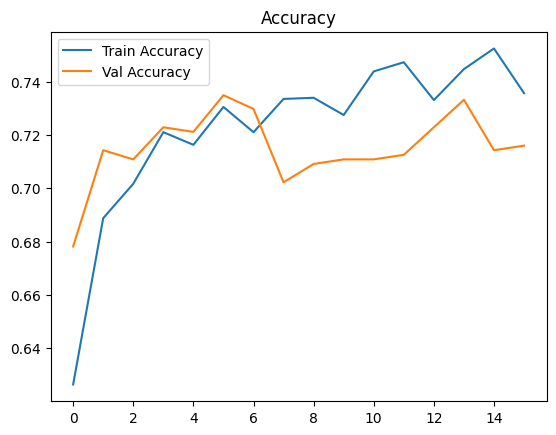

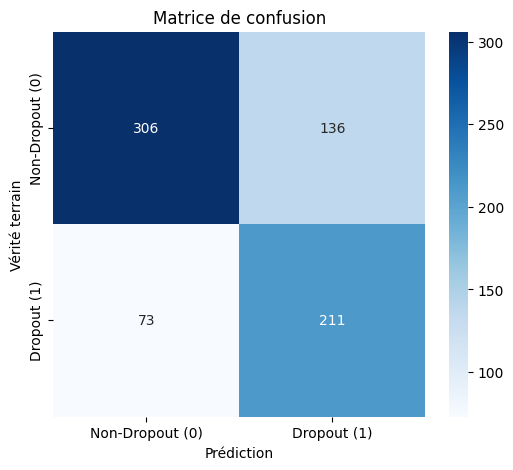

                 precision    recall  f1-score   support

Non-Dropout (0)       0.81      0.69      0.75       442
    Dropout (1)       0.61      0.74      0.67       284

       accuracy                           0.71       726
      macro avg       0.71      0.72      0.71       726
   weighted avg       0.73      0.71      0.72       726



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix

# (si besoin) numpy / seaborn / matplotlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Données ----------
df_ml3 = encode_dataset(dataEtudeSup, use_one_hot=False)
X = df_ml3.drop('Target', axis=1)
y = df_ml3['Target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ---------- Scaling (corrigé : on scale bien train/test, pas X_tr/X_te) ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

X_test_mlp = X_test_scaled
y_test_mlp = y_test

# ---------- Modèle ----------
model_mlp = Sequential([
    Dense(64, activation='relu', input_dim=X_train_scaled.shape[1]),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_mlp.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ---------- Poids de classes (déséquilibre) ----------
cw = class_weight.compute_class_weight(class_weight='balanced',
                                       classes=np.unique(y_train),
                                       y=y_train)
class_weights = dict(enumerate(cw))

# ---------- Early stopping ----------
early_stop = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# ---------- Entraînement ----------
history = model_mlp.fit(
    X_train_scaled, y_train,
    epochs=50, batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop],
    class_weight=class_weights,
    verbose=1
)

# ---------- Seuil PR-optimal (F1) ----------
y_pred_prob = model_mlp.predict(X_test_scaled).flatten()
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_index = np.argmax(f1_scores)
best_threshold = np.clip(thresholds[best_index], 0.0, 1.0)
print(f"Seuil optimal ajusté (F1): {best_threshold:.4f}")

y_pred_adjusted = (y_pred_prob > best_threshold).astype(int)

# ---------- Évaluation ----------
loss, accuracy = model_mlp.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")

# ---------- Courbes d'apprentissage ----------
plt.figure()
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

# ---------- Matrice de confusion ----------
cm = confusion_matrix(y_test, y_pred_adjusted)
labels = ['Non-Dropout (0)', 'Dropout (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prédiction')
plt.ylabel('Vérité terrain')
plt.title('Matrice de confusion')
plt.show()

# ---------- Rapport ----------
print(classification_report(y_test, y_pred_adjusted, target_names=labels))


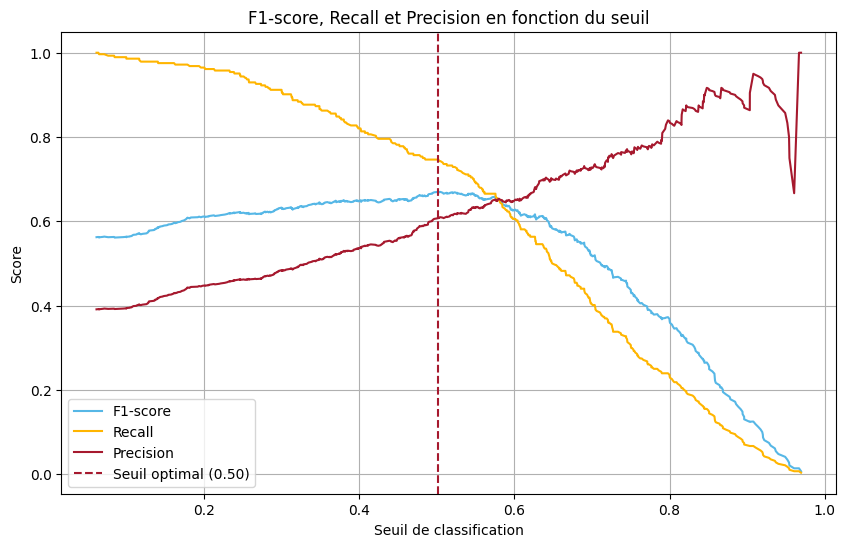

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(thresholds, f1_scores[:-1], label='F1-score', color=color_list_graph[0])
plt.plot(thresholds, recalls[:-1], label='Recall', color=color_list_graph[1])
plt.plot(thresholds, precisions[:-1], label='Precision', color=color_list_graph[2])


plt.axvline(x=best_threshold, color=color_list_graph[2], linestyle='--', label=f'Seuil optimal ({best_threshold:.2f})')
plt.xlabel('Seuil de classification')
plt.ylabel('Score')
plt.title('F1-score, Recall et Precision en fonction du seuil')
plt.legend()
plt.grid()
plt.show()

## XGboost

In [ ]:
#pip install xgboost


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer, f1_score, classification_report, precision_recall_curve, confusion_matrix
from scipy.stats import uniform, randint
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ⚠️ Ici, on part du même split/scaling que RL et MLP :
# X_train, X_test, y_train, y_test, X_train_scaled, X_test_scaled

# --- 1) Rééquilibrage avec SMOTE (uniquement sur le train) ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Avant SMOTE :", np.bincount(y_train))
print("Après SMOTE :", np.bincount(y_train_resampled))

# --- 2) Modèle + recherche aléatoire d’hyperparamètres ---
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(2, 10),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 0.5),
    'colsample_bytree': uniform(0.5, 0.5),
    'gamma': uniform(0, 1),
    'min_child_weight': randint(1, 10)
}

f1_scorer = make_scorer(f1_score, average='binary')

random_search = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring=f1_scorer,
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_resampled, y_train_resampled)

print("Meilleurs paramètres :")
print(random_search.best_params_)

# --- 3) Meilleur modèle trouvé ---
best_model_xboost = random_search.best_estimator_

# --- 4) Évaluation sur le test cohérent ---
y_pred_proba = best_model_xboost.predict_proba(X_test_scaled)[:, 1]

# Recherche du seuil optimal via F1
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
print(f"Seuil optimal basé sur F1-score : {best_threshold:.2f}")

y_pred_opt = (y_pred_proba >= best_threshold).astype(int)

# Rapport
print("Rapport de classification avec seuil optimal :")
print(classification_report(y_test, y_pred_opt, target_names=['Non-Dropout (0)', 'Dropout (1)']))

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred_opt)
labels = ['Non-Dropout (0)', 'Dropout (1)']
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Prédiction"); plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion - Seuil optimisé (XGBoost)")
plt.show()


ModuleNotFoundError: No module named 'xgboost'

# Comparaison des modlèles


In [ ]:
# ==== HARMONISATION (à mettre juste avant la boucle ROC) ====

# 1) Recréer la base one-hot commune (au cas où d'anciens objets trainent)
df_model_cmp   = df_transformed.drop(columns=colonnes_a_supprimer, errors='ignore').copy()
df_encoded_cmp = encode_dataset(df_model_cmp, use_one_hot=True, drop_first=True)

X_all_cmp = df_encoded_cmp.drop(columns=['Target'])
y_all_cmp = df_encoded_cmp['Target']

from sklearn.model_selection import train_test_split
X_train_cmp, X_test_cmp, y_train_cmp, y_test_cmp = train_test_split(
    X_all_cmp, y_all_cmp, test_size=0.2, stratify=y_all_cmp, random_state=42
)

# 2) Scaler commun pour MLP/XGB (RL n'en a pas besoin)
from sklearn.preprocessing import StandardScaler
_scaler_cmp = StandardScaler()
X_train_scaled_cmp = _scaler_cmp.fit_transform(X_train_cmp)
X_test_scaled_cmp  = _scaler_cmp.transform(X_test_cmp)

# 3) Recréer un pipe RL tout neuf (pour effacer tout état / keep_cols_ précédent)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

_best_k = 10
pipe_best = Pipeline(steps=[
    ('pval',   UnivariatePValueSelector(alpha=0.05, method='fdr_bh', min_keep=max(10, _best_k))),
    ('scaler', StandardScaler()),
    ('rfe',    RFE(estimator=LogisticRegression(solver='liblinear', max_iter=2000, class_weight='balanced'),
                   n_features_to_select=_best_k)),
    ('clf',    LogisticRegression(solver='liblinear', max_iter=2000, class_weight='balanced')),
])
pipe_best.fit(X_train_cmp, y_train_cmp)

# 4) Définir explicitement les datasets que la comparaison va utiliser
# (on supprime les anciens alias pour éviter toute confusion)
for _alias in ['X_test_rl','y_test_rl','X_test_mlp','y_test_mlp','X_test_xgb','y_test_xgb']:
    try:
        del globals()[_alias]
    except KeyError:
        pass

# RL : passe X_test non-scalé (le scaler est dans le pipeline)
X_test_rl = X_test_cmp
y_test_rl = y_test_cmp

# MLP : passe la version scalée
X_test_mlp = X_test_scaled_cmp
y_test_mlp = y_test_cmp

# XGBoost : passe la version scalée
X_test_xgb = X_test_scaled_cmp
y_test_xgb = y_test_cmp

# 5) Petites vérifications de cohérence
assert X_test_rl.shape[0]  == y_test_rl.shape[0]
assert X_test_mlp.shape[0] == y_test_mlp.shape[0]
assert X_test_xgb.shape[0] == y_test_xgb.shape[0]


[RL_RFE] AUC = 0.773 | n=726
[MLP] AUC = 0.772 | n=726
[XGBoost] AUC = 0.777 | n=726


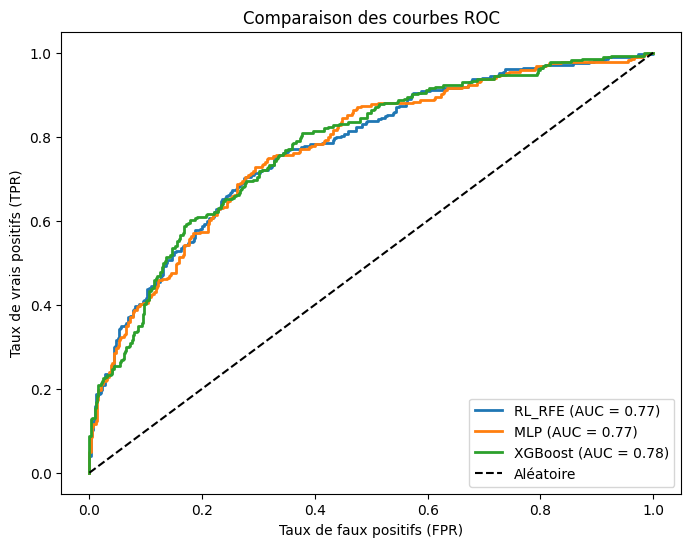

In [ ]:
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# --- 0) Harmonisation minimale: quels X_test pour qui ---
# RL (pipeline contient son propre StandardScaler)
X_test_rl_final = X_test          # non-scalé
y_test_rl_final = y_test

# MLP & XGBoost (utilisent le scaler commun)
X_test_mlp_final = X_test_scaled
y_test_mlp_final = y_test

X_test_xgb_final = X_test_scaled
y_test_xgb_final = y_test

# --- 1) S’assurer que la RL est bien fit sur le split commun ---
try:
    pipe_best.fit(X_train, y_train)
except Exception as e:
    print("[RL] Refit impossible:", e)

# --- 2) Construction des courbes avec garde-fous ---
plt.figure(figsize=(8,6))
models = {
    "RL_RFE": ("rl", pipe_best),
    "MLP": ("mlp", model_mlp if 'model_mlp' in globals() else None),
    "XGBoost": ("xgb", best_model_xboost if 'best_model_xboost' in globals() else None),
}

n_plotted = 0
for name, (kind, mdl) in models.items():
    if mdl is None:
        print(f"[{name}] ignoré: modèle non défini.")
        continue

    try:
        if kind == "rl":
            y_pred_prob = mdl.predict_proba(X_test_rl_final)[:, 1]
            y_true      = y_test_rl_final
        elif kind == "mlp":
            # Keras renvoie (n,1) ou (n,), on aplatit
            y_pred_prob = np.asarray(mdl.predict(X_test_mlp_final, verbose=0)).ravel()
            y_true      = y_test_mlp_final
        else:  # xgb
            y_pred_prob = mdl.predict_proba(X_test_xgb_final)[:, 1]
            y_true      = y_test_xgb_final

        # contrôles de base
        assert len(y_pred_prob) == len(y_true), f"taille différente: proba={len(y_pred_prob)} vs y={len(y_true)}"
        assert np.isfinite(y_pred_prob).all(), "probas NaN/inf"

        fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        print(f"[{name}] AUC = {roc_auc:.3f} | n={len(y_true)}")

        plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")
        n_plotted += 1

    except Exception as e:
        print(f"[{name}] SKIP: {e}")

# --- 3) habillage ---
plt.plot([0,1], [0,1], 'k--', label="Aléatoire")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Comparaison des courbes ROC")
if n_plotted > 0:
    plt.legend(loc="lower right")
else:
    print("Aucune courbe tracée: tous les modèles ont été ignorés.")
plt.show()
